## HIV MODEL_SEUNGU LYU VERSION

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
#number of activated, uninfected CD4 lymphocytes R, latently infected cells L, actively infected cells E, and free virons V
state = State(R = 200, L = 0, E = 0, V = 0.0000004)
system = System(gamma = 1.36,
                mu = 0.00136,
                tau = 0.2,
                beta = 0.00027,
                rho = 0.1,
                alpha = 0.036,
                sigma = 2,
                delta = 0.33,
                pi = 100,
                dt = 0.1)

,values
gamma,1.36000
mu,0.00136
tau,0.20000
beta,0.00027
rho,0.10000
alpha,0.03600
sigma,2.00000
delta,0.33000
pi,100.00000
dt,0.10000


In [3]:
def update_func(state, t, system):
    unpack(system)
   
    r, l, e, v = state
    r1 = (gamma*tau) - (mu*r) - (beta*r*v)
    l1 = rho*beta*r*v - mu*l - alpha*l 
    e1 = (1-rho)*beta*r*v + alpha*l - delta*e
    v1 = pi*e - sigma*v 
    
    r += dt*r1
    l += dt*l1
    e += dt*e1
    v += dt*v1
    
    return State(R=r, L=l, E=e, V=v)

In [4]:
def run_simulation(system, update_func, state, t_end):
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[0] = state
    
    for t in linrange(0, t_end):
        state = frame.row[t]
        for k in linrange(0,1/dt):
            state = update_func(state,t,system)
        frame.row[t+1] = state
    
    return frame

In [5]:
frame = run_simulation(system, update_func, state, 120)

,R,L,E,V
0,200.000000,0.000000e+00,0.000000e+00,4.000000e-07
1,200.000000,1.602603e-09,1.269456e-08,4.024930e-07
2,200.000000,5.271198e-09,3.943753e-08,1.234185e-06
3,200.000000,1.659301e-08,1.220170e-07,3.818183e-06
4,199.999999,5.161076e-08,3.775155e-07,1.181321e-05
5,199.999998,1.599443e-07,1.168027e-06,3.654978e-05
6,199.999995,4.951170e-07,3.613865e-06,1.130846e-04
7,199.999984,1.532129e-06,1.118128e-05,3.498831e-04
8,199.999951,4.740629e-06,3.459480e-05,1.082536e-03
9,199.999849,1.466770e-05,1.070361e-04,3.349360e-03


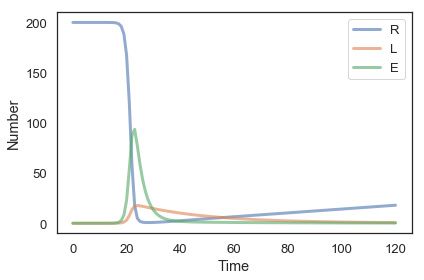

In [11]:
plot(frame['R'], label='R')
plot(frame['L'], label='L')
plot(frame['E'], label='E')
#plot(frame['V'], label='V')
decorate(xlabel='Time',
         ylabel='Number',
         loc='upper right')

In [7]:
def slope_func(state, t, system):
    unpack(system)
   
    r, l, e, v = state
    r1 = (gamma*tau) - (mu*r) - (beta*r*v)
    l1 = rho*beta*r*v - mu*l - alpha*l 
    e1 = (1-rho)*beta*r*v + alpha*l - delta*e
    v1 = pi*e - sigma*v 
    
    return r1,l1,e1,v1

In [8]:
system.set(init = state, t_end = 120)
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,662
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


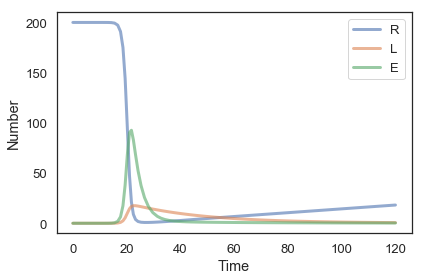

In [9]:
plot(results.R, label='R')
plot(results.L, label='L')
plot(results.E, label='E')
#plot(results.V, label='V')
decorate(xlabel='Time',
         ylabel='Number',
         loc='upper right')